<a href="https://colab.research.google.com/github/KuzyaLakomkin1/DataAnalyst/blob/main/%D0%A0%D0%B0%D0%B7%D0%B2%D0%B5%D0%B4%D0%BE%D1%87%D0%BD%D1%8B%D0%B9%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%BF%D0%BE%20%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D1%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Разведочный анализ по датасету IMDb Movies: 5000 фильмов с наибольшим рейтингом. Часть 2: Анализ количественных и категориальных признаков, а также взаимосвязи признаков**

![](https://adabul.com/wp-content/uploads/2020/04/diziler-360x240.jpg)

## 1. Описание датасета и задания

Представлен датасет с данными о 5000 фильмах, имеющих наибольший рейтинг на сайте IMDb (датасет выложен на платформе [Kaggle](https://www.kaggle.com/datasets/totoro29/imdb-movies)).

***Информация, содержащаяся в датасете:***
1.   Ссылка на постер фильма (poster).
2.   Наименование фильма (title).
3.   Класс фильма по рейтингу the British Board of Film Classification (BBFC) (certificate).
4.   Продолжительность фильма (runtime).
5.   Жанр фильма (genre).
6.   Рейтинг фильма на платформе IMBD (rating).
7.   Описание сюжета фильма (about).
8.   Кинорежиссер фильма (director).
9.   Актеры-звезды фильма (stars).
10.  Количество проголосовавших за фильм (votes).
11.  Доход с фильма (gross_earn).

***Задача:***
провести разведочный анализ данных, найти взаимосвязи и сформулировать выводы.

**В части 2 задания необходимо:**
1.   Выполнить неграфический и графический анализ количественных признаков.
2.   Выполнить неграфический и графический анализ категориальных признаков.
3.   Выполнить анализ взаимосвязи двух количественных признаков.
4.   Выполнить анализ взаимосвязи двух категориальных признаков.
5.   Выполнить анализ взаимосвязи количественного и категориального признаков.

****Задания со звездочкой факультативные (дополнительные)***

## 2. Загрузка датасета

Импортируйте модуль files для подгрузки датасета с ПК

In [ ]:
from google.colab import files

Загрузите файл movies_clean.csv (сохранен по итогу выполнения предыдущего задания) с помощью files.upload()

In [ ]:
files.upload()

Saving movies_clean (1).csv to movies_clean (1).csv


{'movies_clean (1).csv': b',poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear\n0,https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png,Superbabies: Baby Geniuses 2,U,88 min,"Comedy, Family, Sci-Fi",1.5,A group of smart-talking toddlers find themselves at the center of a media mogul\'s experiment to crack the code to baby talk. The toddlers must race against time for the sake of babies everywhere.,Bob Clark,"(\'Jon Voight\',), (\'Scott Baio\',), (\'Vanessa Angel\',), (\'Skyler Shaye\',)","31,069",9.11,88\n1,https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png,The Hottie & the Nottie,12A,91 min,"Comedy, Romance",1.9,A woman agrees to go on a date with a man only if he finds a suitor for her unattractive best friend.,Tom Putnam,"(\'Paris Hilton\',), (\'Joel David Moore\',), (\'Christine Lakin\',), (\'Johann Urb\',)","38,334",0.03,91\n2,https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png,From Justin to Kelly,PG,81 min,

## 3. Подгрузка данных в питон и начало работы с ними

Импортируйте библиотеку pandas и присвойте ей короткое название pd

In [ ]:
import pandas as pd

Откройте датасет movies_clean.csv и сохраните его в переменную dataset

In [ ]:
dataset = pd.read_csv('movies_clean (1).csv')

Проведите обзор таблицы с помощью метода head()

In [ ]:
dataset.head()

,Unnamed: 0,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear
0,0,https://m.media-amazon.com/images/S/sash/4Fyxw...,Superbabies: Baby Geniuses 2,U,88 min,"Comedy, Family, Sci-Fi",1.5,A group of smart-talking toddlers find themsel...,Bob Clark,"('Jon Voight',), ('Scott Baio',), ('Vanessa An...","31,069",9.11,88
1,1,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Hottie & the Nottie,12A,91 min,"Comedy, Romance",1.9,A woman agrees to go on a date with a man only...,Tom Putnam,"('Paris Hilton',), ('Joel David Moore',), ('Ch...","38,334",0.03,91
2,2,https://m.media-amazon.com/images/S/sash/4Fyxw...,From Justin to Kelly,PG,81 min,"Comedy, Musical, Romance",1.9,A waitress from Texas and a college student fr...,Robert Iscove,"('Kelly Clarkson',), ('Justin Guarini',), ('Ka...","26,478",4.92,81
3,3,https://m.media-amazon.com/images/S/sash/4Fyxw...,Disaster Movie,12A,87 min,"Comedy, Sci-Fi",1.9,"Over the course of one evening, an unsuspectin...",Jason Friedberg,"('Aaron Seltzer',), ('Carmen Electra',), ('Van...","91,413",14.19,87
4,4,https://m.media-amazon.com/images/S/sash/4Fyxw...,House of the Dead,15,90 min,"Action, Adventure, Horror",2.1,A group of college students travels to a myste...,Uwe Boll,"('Jonathan Cherry',), ('Tyron Leitso',), ('Cli...","37,338",10.25,90


Удалите столбец 'Unnamed: 0' как ненужный с помощью метода drop(), передав в него параметры columns и inplace=True

In [ ]:
dataset.drop(columns='Unnamed: 0', inplace=True)

## 4. Оценка размеров датасета, выбор признаков для анализа

Оцените размеры датасета с помощью атрибута shape

In [ ]:
dataset.shape

(4970, 12)

Выведите информацию о датасете с помощью метода info()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   poster         4970 non-null   object 
 1   title          4970 non-null   object 
 2   certificate    4970 non-null   object 
 3   runtime        4970 non-null   object 
 4   genre          4970 non-null   object 
 5   rating         4970 non-null   float64
 6   about          4956 non-null   object 
 7   director       4970 non-null   object 
 8   stars          4970 non-null   object 
 9   votes          4970 non-null   object 
 10  gross_earn     4574 non-null   float64
 11  runtime_clear  4970 non-null   int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 466.1+ KB


**Признаки, которые будут использованы для дальнейшего анализа:**

***Количественные признаки:***
1.   Продолжительность фильма: runtime_clear
2.   Доход с фильма: gross_earn_clear

***Категориальные признаки:***
1.   Наименование фильма: title
2.   Класс фильма: certificate
3.   Жанр фильма: genre
4.   Рейтинг фильма: rating
5.   Кинорежиссер: director
6.   Актеры-звезды фильма: stars


## 5. Неграфический и графический анализ количественных признаков

Выполните неграфический и графический анализ количественных признаков

### *5.1. gross_earn_clear*

Сохраните Series ['gross_earn_clear'] в переменную gross_earn

In [ ]:
gross_earn = dataset['gross_earn']

Рассчитайте максимальное и минимальное значения доходов с фильмов с помощью методов max() и min() соответственно. Выведите значения на печать

In [ ]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  936.66 Наименьший доход:  0.0


Рассмотрите наблюдения, у которых значение по признаку gross_earn равно 0.0

In [ ]:
dataset[dataset['gross_earn']==0.0]

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear
161,https://m.media-amazon.com/images/S/sash/4Fyxw...,ATM,15,90 min,"Horror, Thriller",4.7,"On a late night visit to an ATM, three co-work...",David Brooks,"('Alice Eve',), ('Josh Peck',), ('Brian Geragh...","23,960",0.0,90
578,https://m.media-amazon.com/images/S/sash/4Fyxw...,Wild Card,15,92 min,"Action, Crime, Drama",5.6,When a Las Vegas bodyguard with lethal skills ...,Simon West,"('Jason Statham',), ('Michael Angarano',), ('D...","55,803",0.0,92
585,https://m.media-amazon.com/images/S/sash/4Fyxw...,I Spit on Your Grave 2,18,106 min,"Horror, Thriller",5.6,When Katie innocently accepts an offer to have...,Steven R. Monroe,"('Jemma Dallender',), ('Joe Absolom',), ('Yavo...","29,901",0.0,106
987,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Condemned,18,114 min,"Action, Crime, Thriller",6.0,Jack Conrad is awaiting the death penalty in a...,Scott Wiper,"('Steve Austin',), ('Vinnie Jones',), ('Nathan...","52,430",0.0,114
1137,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Oxford Murders,15,108 min,"Adventure, Crime, Horror",6.1,"At Oxford University, a professor and a grad s...",Álex de la Iglesia,"('Elijah Wood',), ('John Hurt',), ('Leonor Wat...","29,257",0.0,108
1262,https://m.media-amazon.com/images/S/sash/4Fyxw...,Burke and Hare,15,91 min,"Comedy, Crime, History",6.1,A black comedy about two 19th-century grave ro...,John Landis,"('Bill Bailey',), ('Tom Wilkinson',), ('Michae...","20,331",0.0,91
1295,https://m.media-amazon.com/images/S/sash/4Fyxw...,Chalet Girl,12A,97 min,"Comedy, Romance, Sport",6.2,Former skateboard champion Kim wants to make m...,Phil Traill,"('Felicity Jones',), ('Ed Westwick',), ('Bill ...","25,470",0.0,97
1483,https://m.media-amazon.com/images/S/sash/4Fyxw...,Flypaper,15,87 min,"Comedy, Crime, Mystery",6.3,A man caught in the middle of two simultaneous...,Rob Minkoff,"('Patrick Dempsey',), ('Ashley Judd',), ('Tim ...","33,003",0.0,87
1689,https://m.media-amazon.com/images/S/sash/4Fyxw...,Son of a Gun,15,108 min,"Action, Crime, Drama",6.4,"JR busts out of prison with Brendan Lynch, Aus...",Julius Avery,"('Ewan McGregor',), ('Brenton Thwaites',), ('A...","28,121",0.0,108
2475,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ginger Snaps,18,108 min,"Drama, Fantasy, Horror",6.8,"Two death-obsessed sisters, outcasts in their ...",John Fawcett,"('Emily Perkins',), ('Katharine Isabelle',), (...","47,082",0.0,108


Таких значений не так много. Можно их исключить из анализа. Перезапишите переменную gross_earn, исключив нулевые значения

In [ ]:
gross_earn = dataset[dataset['gross_earn']!=0.0]['gross_earn']

Снова рассчитайте максимальное и минимальное значения доходов с фильмов. Выведите значения на печать

In [ ]:
max_value = gross_earn.max()
min_value = gross_earn.min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  936.66 Наименьший доход:  0.01


Рассчитайте среднее значение признака с помощью метода mean(). Выведите значение на печать

In [ ]:
mean_value = gross_earn.mean()
print('Средний доход с фильма: ', mean_value)

Средний доход с фильма:  49.07882623957877


Рассчитайте медианное значение признака с помощью метода median(). Выведите значение на печать

In [ ]:
median_value = gross_earn.median()
print('Медиана доходов фильмов: ', median_value)

Медиана доходов фильмов:  28.345


Рассчитайте процентили (10, 25, 50, 75, 90) с помощью метода quantile(). Выведите значения на печать

In [ ]:
percentile_10_value = gross_earn.quantile(0.10)
percentile_25_value = gross_earn.quantile(0.25)
percentile_50_value = gross_earn.quantile(0.50)
percentile_75_value = gross_earn.quantile(0.75)
percentile_90_value = gross_earn.quantile(0.90)
print('10-й процентиль доходов фильмов: ', percentile_10_value)
print('25-й процентиль доходов фильмов: ', percentile_25_value)
print('50-й процентиль доходов фильмов: ', percentile_50_value)
print('75-й процентиль доходов фильмов: ', percentile_75_value)
print('90-й процентиль доходов фильмов: ', percentile_90_value)

10-й процентиль доходов фильмов:  0.7970000000000005
25-й процентиль доходов фильмов:  7.0
50-й процентиль доходов фильмов:  28.345
75-й процентиль доходов фильмов:  63.04
90-й процентиль доходов фильмов:  121.96800000000002


Выведите показатели описательной статистики с помощью метода describe()

In [ ]:
gross_earn.describe()

count    4558.000000
mean       49.078826
std        67.171717
min         0.010000
25%         7.000000
50%        28.345000
75%        63.040000
max       936.660000
Name: gross_earn, dtype: float64

Импортируйте библиотеку matplotlib с расширением pyplot, присвоив короткое название plt

In [ ]:
import matplotlib.pyplot as plt

Постройте диаграмму "ящик с усами" с помощью метода boxplot()

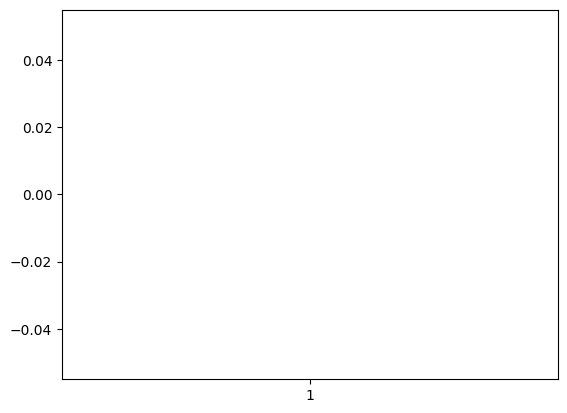

In [ ]:
plt.boxplot(gross_earn)
plt.show()

Диаграмма пустая. Это связано с наличием пропущенных значений по признаку.
<br>Попробуйте построить гистограмму с помощью метода hist(), чтобы посмотреть на распределение признака.

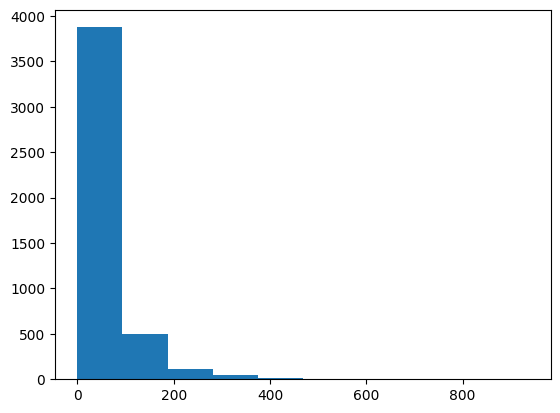

In [ ]:
plt.hist(gross_earn)
plt.show()

Гистограмма показывает, на достаточно большой размах в данных, что подтверждается и показателями описательной статистики (min и max). Ограничьте графический анализ 10 процентилем снизу и 90 процентилем сверху, тем самым обработав часть выбросов, и заново постройте "ящик с усами"

In [ ]:
gross_earn_2 = dataset[
    (dataset['gross_earn']>=percentile_10_value)&
    (dataset['gross_earn']<=percentile_90_value)]['gross_earn']

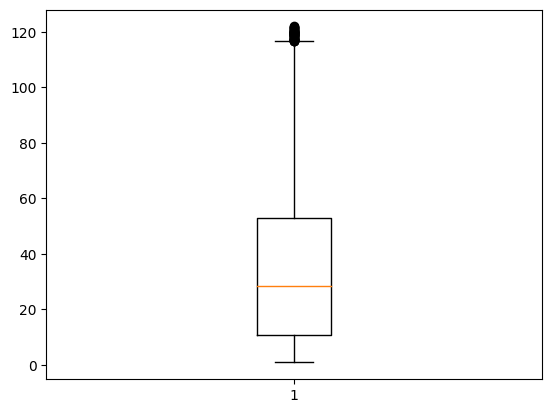

In [ ]:
plt.boxplot(gross_earn_2)
plt.show()

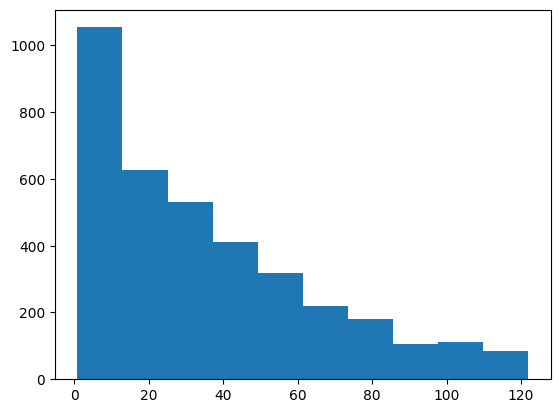

In [ ]:
plt.hist(gross_earn_2)
plt.show()

Также, заново постройте гистограмму, при этом передав в нее параметр bins=20 для лучшей визуализации

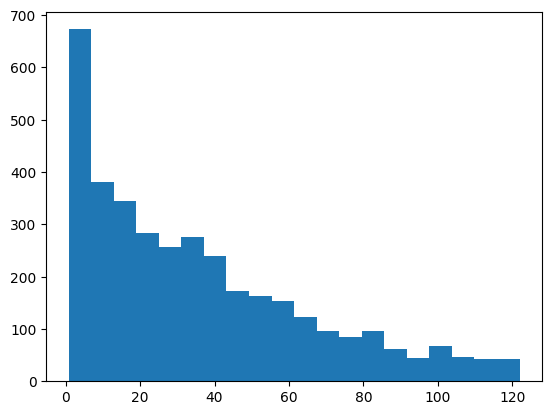

In [ ]:
plt.hist(gross_earn_2, bins=20)
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О максимальных и минимальных значениях признака (оцените размах значений).
2.   О нулевых значениях (их наличие, нужна ли предобработка).
3.   О средних величинах (среднее, медиана, их отличия, возможные причины).
4.   О процентилях (сколько процентов данных не превышают то или иное значение).
5.   О результатах графического анализа (необходимость исключения выбросов, что показывает "ящик с усами", что показывает гистограмма).


Рассчитали максимальное и минимальное значения доходов с фильмов, наибольший доход:  936.66 Наименьший доход:  0.1.Размах значений является довольно таки большим.
Нулевые значение были , в процессе анализа мы решили их убрать.
Расчитали среднее и медианное значение. Средний доход с фильма получился : 49.07,Медиана доходов фильмов:  28.345.Среднее арифметическое набора данных находится суммированием всех чисел в выборке и делением полученной суммы на количество чисел. Медиана — это число, которое окажется строго по центру списка чисел в наборе данных, если их предварительно упорядочить по возрастанию
10 % равно или  не превышают доход 0.7
25 % равно или  не превышают доход 7
50 % равно или не превышают доход 28.345
75 % равно или не превышают доход 63.04
90 % равно или не превышают доход 121.9

Выводы по графику ящик с усами:
Ящик с усами показывает максимальное значение ,размах, минимальное значение, медиану, квартили и выбросы.
Гистограмма:
Показывает что у большинства фильмов доход ~7.





### **5.2. runtime_clear*

По аналогии проанализируйте продолжительность фильмов

Наибольшая продолжительность:  366 Наименьшая продолжительность:  45
Средняя продолжительность фильма:  110.3
Медиана доходов фильмов:  106.0
10-й процентиль продолжительности фильма:  89.0
25-й процентиль продолжительности фильма:  96.0
50-й процентиль продолжительности фильма:  106.0
75-й процентиль продолжительности фильма:  120.0
90-й процентиль продолжительности фильма:  135.0


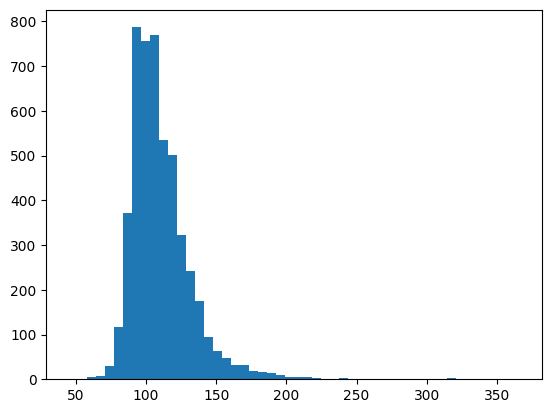

In [ ]:
runtime_clear = dataset['runtime_clear']


max_value = runtime_clear.max()
min_value = runtime_clear.min()
print('Наибольшая продолжительность: ', max_value, 'Наименьшая продолжительность: ', min_value)

mean_value = round(runtime_clear.mean(), 1)
print('Средняя продолжительность фильма: ', mean_value)
median_value = runtime_clear.median()
print('Медиана доходов фильмов: ', median_value)


percentile_10_value = runtime_clear.quantile(0.10)
percentile_25_value = runtime_clear.quantile(0.25)
percentile_50_value = runtime_clear.quantile(0.50)
percentile_75_value = runtime_clear.quantile(0.75)
percentile_90_value = runtime_clear.quantile(0.90)
print('10-й процентиль продолжительности фильма: ', percentile_10_value)
print('25-й процентиль продолжительности фильма: ', percentile_25_value)
print('50-й процентиль продолжительности фильма: ', percentile_50_value)
print('75-й процентиль продолжительности фильма: ', percentile_75_value)
print('90-й процентиль продолжительности фильма: ', percentile_90_value)


plt.hist(runtime_clear, bins=50)
# plt.xlim((None, 20))
plt.show()

## 6. Неграфический и графический анализ категориальных признаков

Выполните неграфический и графический анализ категориальных признаков

### *6.1. certificate*

Описание классификации [the British Board of Film Classification (BBFC)]( https://www.bbfc.co.uk/about-classification/classification-guidelines)

Оцените описательные статистики признака с помощью метода describe()

In [ ]:
dataset['certificate'].describe()

count     4970
unique      15
top         15
freq      1843
Name: certificate, dtype: object

Изучите уникальные значения признака, получив их с помощью метода unique()

In [ ]:
dataset['certificate'].unique()

array(['U', '12A', 'PG', '15', '18', '12', 'PG-13', 'X', 'UA', 'A', 'R',
       'Not Rated', 'Rejected', 'AA', '(Banned)'], dtype=object)

Проведите неграфический структурный анализ с помощью метода value_counts()

In [ ]:
dataset['certificate'].value_counts()

15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
PG-13          11
UA             11
Not Rated       7
Rejected        5
(Banned)        1
Name: certificate, dtype: int64

Сохраните результаты работы метода value_counts() в переменную certificate_counts, отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True) (это необходимо для того, чтобы впоследствии столбчатая диаграмма сортировала значения сверху вниз: наибольшее - сверху, наименьшее - снизу)

In [ ]:
certificate_counts = dataset['certificate'].value_counts().sort_values(ascending=True)

Постройте горизонтальную столбчатую диаграмму с помощью метода barh()

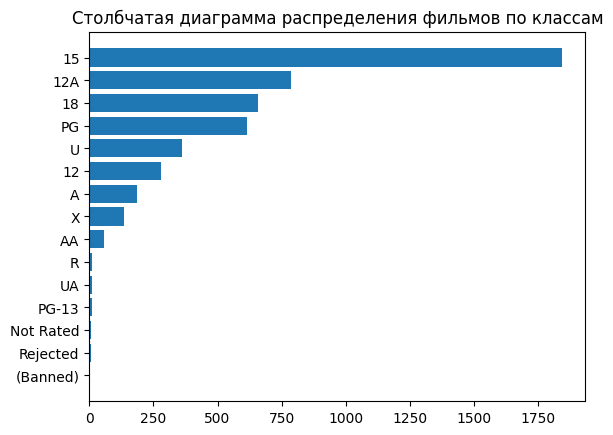

In [ ]:
plt.barh(certificate_counts.index, certificate_counts.values)
plt.title('Столбчатая диаграмма распределения фильмов по классам')
plt.show()

Выделите топ-5 классов, по которым больше всего фильмов и сохраните результат в переменную certificate_counts_top_5

In [ ]:
certificate_counts_top_5 = dataset['certificate'].value_counts()[:5]

Постройте круговую диаграмму с помощью метода pie(), добавив подписи данных с помощью параметра labels и подписи значений с помощью параметра autopct='%.1f' (проценты с одним знаком после запятой)

P.s. При анализе категориальных признаков если категорий не больше 5, то предпочтительна круговая диаграмма, в ином случае - столбчатая

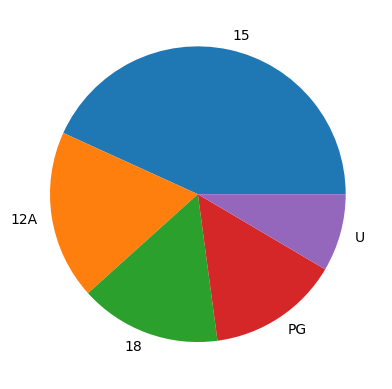

In [ ]:
plt.pie(certificate_counts_top_5.values, labels = certificate_counts_top_5.index)
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О количестве уникальных значений признака.
2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).
3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).
4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).

Выводы:
Количество уникальный признаков равнялось 15
Набиолее часто встречаемое значении признака "15", встретилось оно 1843 раза.
Наименее встречаемые (Banned)
Наиболее встречаемые  "15"
Около 1800 фильмов имеют сертификацию "15"





### **6.2. rating*

По аналогии проанализируйте рейтинг фильмов

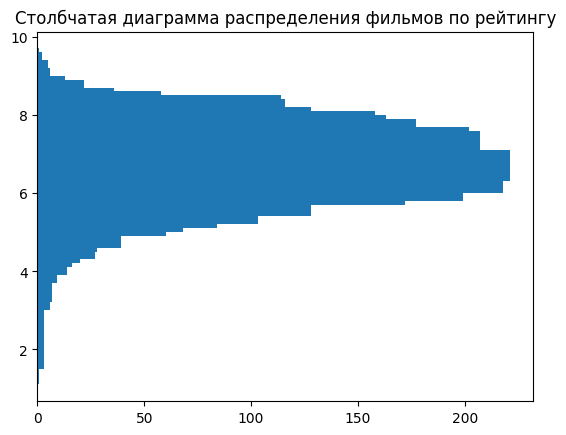

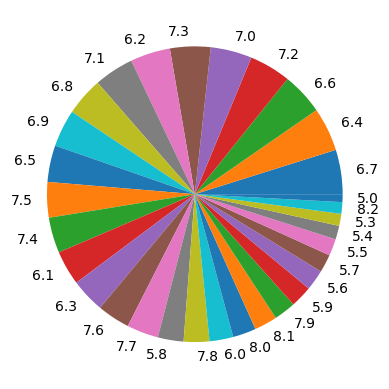

In [ ]:
dataset['rating'].value_counts()
rating_counts = dataset['rating'].value_counts().sort_values(ascending=True)
plt.barh(rating_counts.index, rating_counts.values)
plt.title('Столбчатая диаграмма распределения фильмов по рейтингу')
plt.show()
rating_counts_top_5 = dataset['rating'].value_counts()[:5]
plt.pie(rating_counts_top_5.values, labels = rating_counts_top_5.index)
plt.show()



### **6.3. director*

По аналогии проанализируйте кинорежиссеров

---



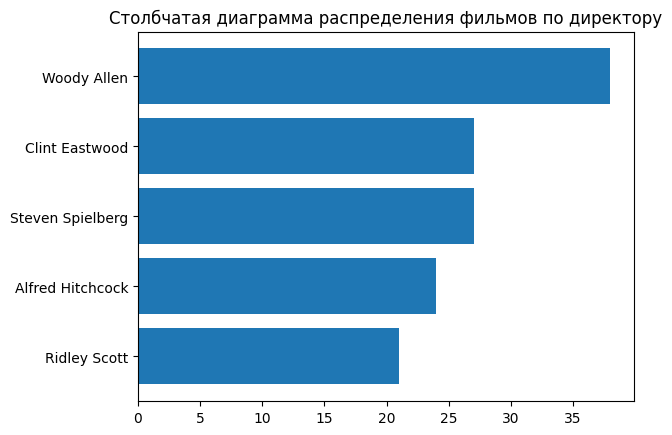

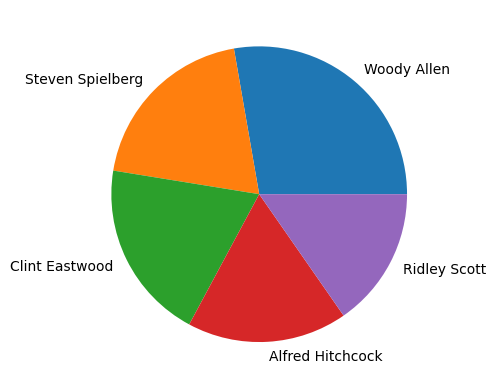

In [ ]:
dataset['director'].value_counts()
director_counts = dataset['director'].value_counts()[:5].sort_values(ascending=True)
plt.barh(director_counts.index, director_counts.values)
plt.title('Столбчатая диаграмма распределения фильмов по директору')
plt.show()
director_top_5 = dataset['director'].value_counts()[:5]
plt.pie(director_top_5.values, labels = director_top_5.index)
plt.show()



## 7. Анализ взаимосвязи двух количественных признаков

Выполните анализ взаимосвязи двух количественных признаков

### *7.1. runtime_clear - gross_earn_clear*

Импортируйте библиотеку seaborn и присвойте ей короткое название sns

In [ ]:
import seaborn as sns

Постройте диаграмму совместного распределения двух количественных переменных с помощью функции jointplot(), передав параметры size и alpha для улучшения визуализации

In [ ]:
dataset.info()
# sns.jointplot(dataset['runtime_clear'], y=['gross_earn'])
# plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   poster         4970 non-null   object 
 1   title          4970 non-null   object 
 2   certificate    4970 non-null   object 
 3   runtime        4970 non-null   object 
 4   genre          4970 non-null   object 
 5   rating         4970 non-null   float64
 6   about          4956 non-null   object 
 7   director       4970 non-null   object 
 8   stars          4970 non-null   object 
 9   votes          4970 non-null   object 
 10  gross_earn     4574 non-null   float64
 11  runtime_clear  4970 non-null   int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 466.1+ KB


Сохраните колонки 'runtime_clear' и 'gross_earn_clear' в переменную columns и постройте диаграммы рассеяния, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

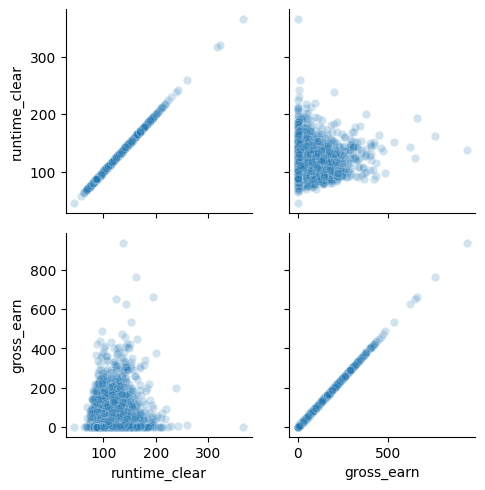

In [ ]:
columns = ['runtime_clear', 'gross_earn']
g = sns.PairGrid(dataset[columns])
g.map(sns.scatterplot, alpha=0.2)

Исключите выбросы, отфильтровав датасет по 99% процентилю. Для этого сохраните копию исходного датасета в переменную new_dataset с помощью метода copy(). Для каждой колонки в columns ограничьте значения 99% процентилем с помощью метода quantile(), сохраняя объект Series в переменную limiter и фильтруя new_dataset по данному ограничению с помощью оператора <=

In [ ]:
new_dataset = dataset
for col in columns:
  limiter = new_dataset[col].quantile(0.99)
  new_dataset = new_dataset[new_dataset[col]<=limiter]

Постройте диаграммы рассеяния по данным датасета new_dataset, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

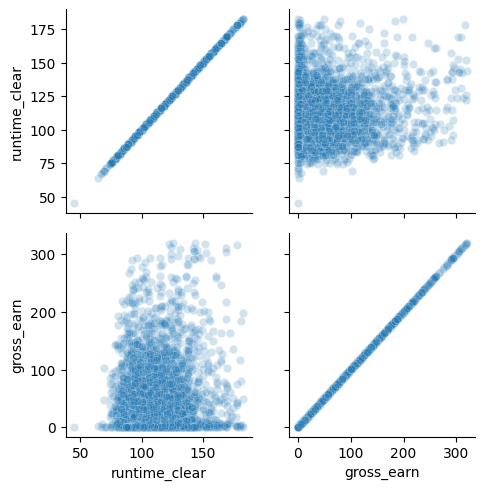

In [ ]:
g = sns.PairGrid(new_dataset[columns])
g.map(sns.scatterplot, alpha=.2)

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, какая взаимосвязь (линейная, нелинейная)).

Следует предположить, т.е. составить гипотезу, что данные показатели независимы, а далее проверить эту гипотезу в рамках статистического анализа. Фильмы собравшие больше 30000, имеют продолжительность больше 120 минут.

## 8. Анализ взаимосвязи двух категориальных признаков

Выполните анализ взаимосвязи двух категориальных признаков

### *8.1. director - certificate*

Сохраните уникальные значения признака 'director', определенные с помощью метода unique(), в переменную directors и определите их количество с помощью функции len()

In [ ]:
directors = dataset['director'].unique()
len(directors)

1954

Проведите неграфический структурный анализ признака с помощью метода value_counts()

In [ ]:
dataset['director'].value_counts()

Woody Allen         38
Steven Spielberg    27
Clint Eastwood      27
Alfred Hitchcock    24
Ridley Scott        21
                    ..
Nick Murphy          1
Scott Speer          1
J.B. Rogers          1
David Soren          1
Ertem Egilmez        1
Name: director, Length: 1954, dtype: int64

Определите топ-5 кинорежиссеров с помощью метода value_counts() и среза, выведите их список при помощи атрибута index и сохраните его в переменную directors_top_5

In [ ]:
directors_top_5 = dataset['director'].value_counts()[:5].index
directors_top_5

Index(['Woody Allen', 'Steven Spielberg', 'Clint Eastwood', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object')

Для корректного визуального представления распределения признака 'certificate' создайте словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраните уникальные значения признака, затем в переменную colors сохраните словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors

In [ ]:
labels =  dataset['certificate'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{'U': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 '12A': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'PG': (1.0, 0.4980392156862745, 0.054901960784313725),
 '15': (1.0, 0.7333333333333333, 0.47058823529411764),
 '18': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 '12': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'PG-13': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'X': (1.0, 0.596078431372549, 0.5882352941176471),
 'UA': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'A': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'R': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'Not Rated': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'Rejected': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'AA': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 '(Banned)': (0.4980392156862745, 0.4980392156862745, 0.49803

Для каждого кинорежиссера из топ-5 (directors_top_5) постройте круговые диаграммы с помощью метода pie(). Для этого отфильтруйте исходный датасет признаку director и сохраните его в переменную df; сохраните топ-5 классов фильмов (certificate), определенных с помощью метода value_counts() и среза, в переменную certificate_counts; выведите список уникальных значений топ-5 классов с помощью атрибута index и сохраните его в переменную labels; в качестве названия диаграммы передайте кинорежиссера с помощью метода title(); постройте диаграмму, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'

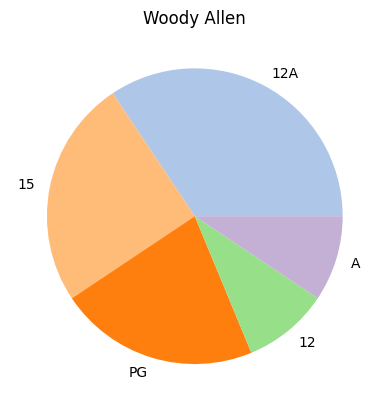

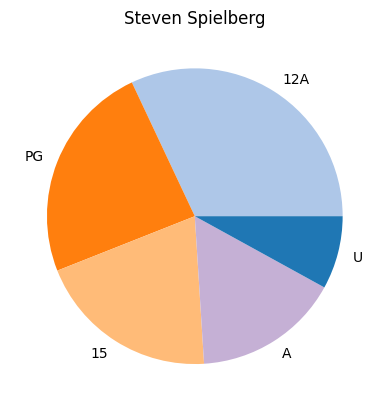

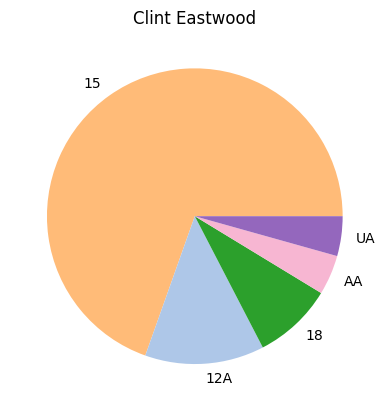

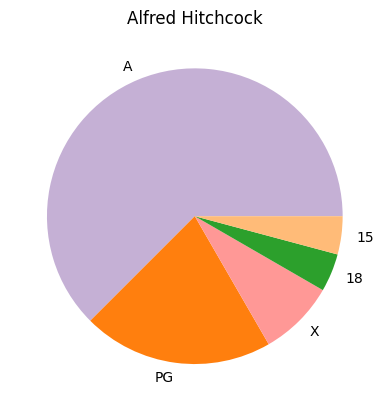

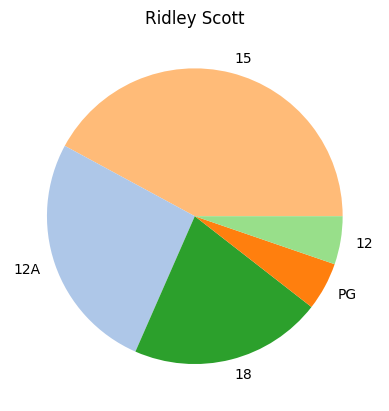

In [ ]:


for director in directors_top_5:
  df =  dataset[dataset['director']==director]

  certificate_counts = df['certificate'].value_counts()[0:5]
  labels = certificate_counts.index

  plt.title(director)
  plt.pie(certificate_counts, labels = labels, colors = [colors[key] for key in labels])
  plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака)

1.Точных взаимосвязей не отслеживается. Можно выделить - фильмы высоких возрастных категорий(18, АА) имеют маленький процент среди остальных
2. Часть режиссеров имеет один ярко выраженный признак(Hitchcock, Eastwood),другие имеют менее выраженный признак

### **8.2. director - rating*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и кинорежиссерами

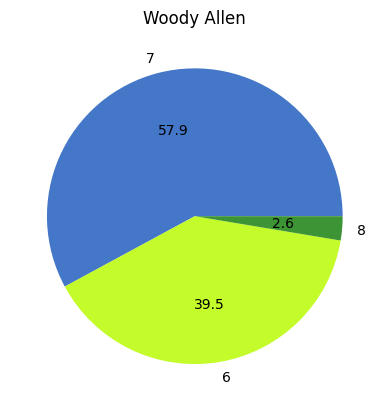

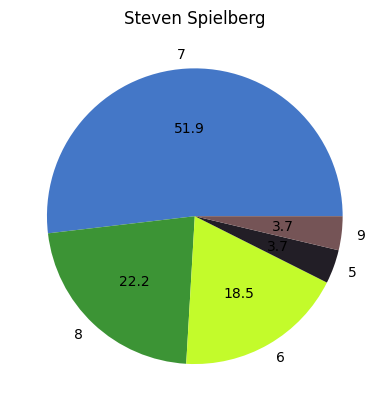

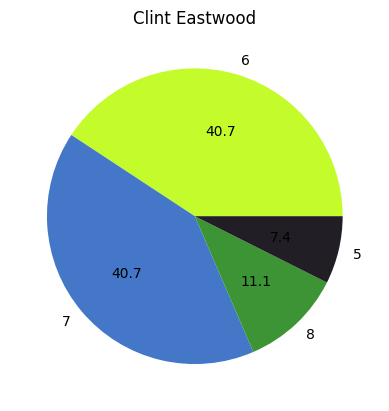

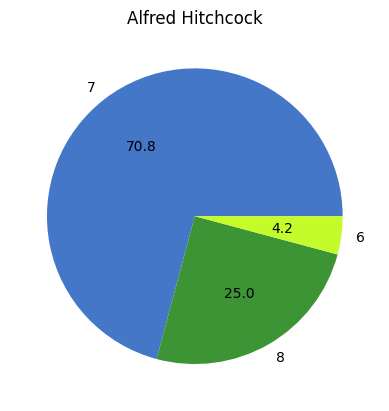

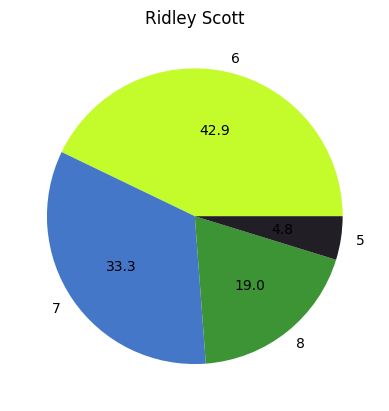

In [ ]:
import random

directors_top_5 = dataset['director'].value_counts()[:5].index
dataset['rating'] = dataset['rating'].astype(int)

colors = {rating:"#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for rating in dataset['rating'].unique()}

for director in directors_top_5:
  print()

  df = dataset[dataset['director']==director]
  rating_counts = df['rating'].value_counts()[:5]
  labels = rating_counts.index


  plt.title(director)
  plt.pie( rating_counts.values, labels = labels, colors = [colors[key] for key in labels], autopct='%.1f')
  plt.show()


### **8.3. certificate - rating*

По аналогии проанализируйте взаимосвязь между классами фильмов и их рейтингом

In [ ]:
# import random

# directors_top_5 = dataset['director'].value_counts()[:5].index
# dataset['rating'] = dataset['rating'].astype(int)

# colors = {rating:"#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for rating in dataset['rating'].unique()}

# for director in directors_top_5:
#   print()

#   df = dataset[dataset['director']==director]
#   rating_counts = df['rating'].value_counts()[:5]
#   labels = rating_counts.index


#   plt.title(director)
#   plt.pie( rating_counts.values, labels = labels, colors = [colors[key] for key in labels], autopct='%.1f')
#   plt.show()

dataset

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear
0,https://m.media-amazon.com/images/S/sash/4Fyxw...,Superbabies: Baby Geniuses 2,U,88 min,"Comedy, Family, Sci-Fi",1,A group of smart-talking toddlers find themsel...,Bob Clark,"('Jon Voight',), ('Scott Baio',), ('Vanessa An...","31,069",9.11,88
1,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Hottie & the Nottie,12A,91 min,"Comedy, Romance",1,A woman agrees to go on a date with a man only...,Tom Putnam,"('Paris Hilton',), ('Joel David Moore',), ('Ch...","38,334",0.03,91
2,https://m.media-amazon.com/images/S/sash/4Fyxw...,From Justin to Kelly,PG,81 min,"Comedy, Musical, Romance",1,A waitress from Texas and a college student fr...,Robert Iscove,"('Kelly Clarkson',), ('Justin Guarini',), ('Ka...","26,478",4.92,81
3,https://m.media-amazon.com/images/S/sash/4Fyxw...,Disaster Movie,12A,87 min,"Comedy, Sci-Fi",1,"Over the course of one evening, an unsuspectin...",Jason Friedberg,"('Aaron Seltzer',), ('Carmen Electra',), ('Van...","91,413",14.19,87
4,https://m.media-amazon.com/images/S/sash/4Fyxw...,House of the Dead,15,90 min,"Action, Adventure, Horror",2,A group of college students travels to a myste...,Uwe Boll,"('Jonathan Cherry',), ('Tyron Leitso',), ('Cli...","37,338",10.25,90
...,...,...,...,...,...,...,...,...,...,...,...,...
4965,https://m.media-amazon.com/images/S/sash/4Fyxw...,12 Angry Men,U,96 min,"Crime, Drama",9,The jury in a New York City murder trial is fr...,Sidney Lumet,"('Henry Fonda',), ('Lee J. Cobb',), ('Martin B...","7,75,906",4.36,96
4966,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather: Part II,X,202 min,"Crime, Drama",9,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"('Al Pacino',), ('Robert De Niro',), ('Robert ...","12,49,182",57.30,202
4967,https://m.media-amazon.com/images/S/sash/4Fyxw...,Hababam Sinifi,12A,87 min,"Comedy, Drama",9,"Lazy, uneducated students share a very close b...",Ertem Egilmez,"('Kemal Sunal',), ('Münir Özkul',), ('Halit Ak...","40,492",NaN,87
4968,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather,X,175 min,"Crime, Drama",9,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"('Marlon Brando',), ('Al Pacino',), ('James Ca...","18,19,641",134.97,175


## 9. Анализ взаимосвязи количественного и категориального признаков

Выполните анализ взаимосвязи категориального и количественного признаков

### *9.1. certificate - gross_earn_clear*

Оцените медианные значения доходов с фильмов в разрезе классов фильмов. Для этого сгруппируйте датасет по признаку certificate с помощью метода groupby и к Series ['gross_earn_clear'] метод median()

In [ ]:
dataset.groupby(by='certificate')['gross_earn'].median()


certificate
(Banned)        NaN
12           41.580
12A          42.650
15           18.840
18           14.945
A            16.140
AA           27.620
Not Rated     0.060
PG           44.340
PG-13         4.840
R             1.110
Rejected      0.050
U            56.700
UA           54.230
X            14.750
Name: gross_earn, dtype: float64

Оцените описательные статистики доходов с фильмов в разрезе классов фильмов, также сгруппировав таблицу и применив метод describe()

In [ ]:
dataset.groupby(by='certificate').describe()

rating                                              gross_earn  \
              count      mean       std  min  25%  50%  75%  max      count   
certificate                                                                   
(Banned)        1.0  6.000000       NaN  6.0  6.0  6.0  6.0  6.0        0.0   
12            278.0  5.978417  0.957340  2.0  6.0  6.0  7.0  8.0      269.0   
12A           788.0  6.072335  1.020051  1.0  5.0  6.0  7.0  9.0      757.0   
15           1843.0  6.237656  0.917293  2.0  6.0  6.0  7.0  9.0     1719.0   
18            659.0  6.195751  1.007380  2.0  6.0  6.0  7.0  8.0      600.0   
A             186.0  7.069892  0.857688  4.0  7.0  7.0  8.0  8.0      126.0   
AA             59.0  6.915254  0.749440  5.0  6.5  7.0  7.0  8.0       52.0   
Not Rated       7.0  6.714286  0.951190  5.0  6.5  7.0  7.0  8.0        5.0   
PG            614.0  6.099349  1.150175  1.0  5.0  6.0  7.0  8.0      581.0   
PG-13          11.0  5.727273  1.272078  3.0  5.5  6.0  6.5  7.0        9.0   
R              12.0  6.500000  1.314257  4.0  6.0  7.0  7.0  8.0       11.0   
Rejected        5.0  6.400000  1.341641  5.0  5.0  7.0  7.0  8.0        3.0   
U             362.0  6.483425  1.084262  1.0  6.0  7.0  7.0  9.0      327.0   
UA             11.0  6.000000  1.095445  4.0  5.0  6.0  7.0  7.0       11.0   
X             134.0  6.977612  0.871145  3.0  7.0  7.0  7.0  9.0      104.0   

                        ...                  runtime_clear              \
                  mean  ...      75%     max         count        mean   
certificate             ...                                              
(Banned)           NaN  ...      NaN     NaN           1.0   91.000000   
12           60.113048  ...   72.220  659.33         278.0  109.982014   
12A          77.310925  ...   95.000  936.66         788.0  115.449239   
15           33.451798  ...   45.870  363.07        1843.0  109.385241   
18           26.607200  ...   36.875  370.78         659.0  109.033384   
A            37.906190  ...   51.245  260.00         186.0  114.397849   
AA           38.855769  ...   57.635  139.88          59.0  114.949153   
Not Rated     3.830000  ...    0.510   18.55           7.0  103.000000   
PG           64.011360  ...   81.060  402.45         614.0  110.058632   
PG-13        11.922222  ...   22.520   36.66          11.0   99.636364   
R             3.487273  ...    5.395   15.56          12.0  134.500000   
Rejected      1.060000  ...    1.575    3.10           5.0   86.200000   
U            85.989083  ...  111.650  486.30         362.0  102.444751   
UA           71.939091  ...  104.220  184.03          11.0  117.636364   
X            23.783846  ...   30.615  232.91         134.0  112.410448   

                                                           
                   std   min    25%    50%     75%    max  
certificate                                                
(Banned)           NaN  91.0   91.0   91.0   91.00   91.0  
12           18.809794  80.0   97.0  107.0  120.00  194.0  
12A          20.309016  75.0  100.0  112.0  127.00  213.0  
15           18.523197  69.0   96.0  106.0  119.00  202.0  
18           21.216186  71.0   95.0  104.0  117.00  321.0  
A            26.469417  58.0   97.0  110.0  125.75  212.0  
AA           24.715920  85.0   98.0  109.0  124.50  205.0  
Not Rated    17.406895  87.0   92.0   95.0  110.50  134.0  
PG           23.005847  70.0   95.0  105.0  118.00  259.0  
PG-13        13.388598  82.0   92.0   95.0  105.50  130.0  
R            74.866548  89.0   97.0  118.0  128.50  366.0  
Rejected     19.967474  64.0   75.0   84.0   91.00  117.0  
U            24.134859  45.0   88.0   96.0  112.00  220.0  
UA           13.086426  96.0  107.5  121.0  127.50  133.0  
X            27.690071  79.0   95.0  108.0  122.00  317.0  

[15 rows x 24 columns]

Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов

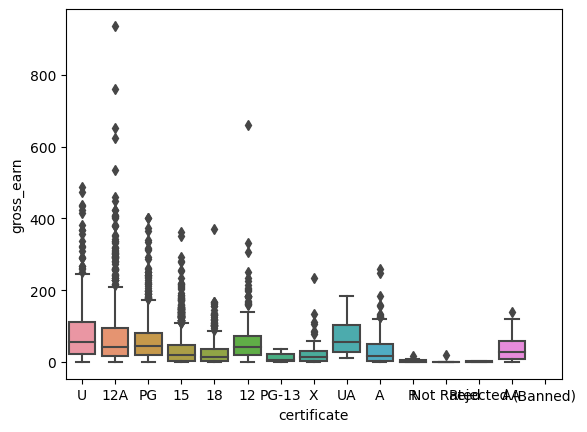

In [ ]:
sns.boxplot(x = 'certificate', y = 'gross_earn', data=dataset)
plt.show()

Диаграмма получилась малоинформативна в связи с наличием выбросов, а также ее нагруженностью по количеству значений классов. Оцените количество значений классов с помощью метода value_counts()

In [ ]:
dataset['certificate'].value_counts()

15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
PG-13          11
UA             11
Not Rated       7
Rejected        5
(Banned)        1
Name: certificate, dtype: int64

По итогу оценки видно, что крупных классов - 8, поэтому ограничим диаграмму топ-8 классов. Для этого сохраните список топ-8 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную certificate_list

In [ ]:
certificate_list = dataset['certificate'].value_counts()[:8].index
certificate_list

Index(['15', '12A', '18', 'PG', 'U', '12', 'A', 'X'], dtype='object')

Отфильтруйте исходный датасет по признаку certificate с помощью метода isin() и сохраните его в переменную dataset_certificate_top_8. Оцените размеры датасета с помощью атрибута shape

In [ ]:
dataset_certificate_top_8 = dataset[dataset['certificate'].isin(certificate_list)]
dataset_certificate_top_8.shape

(4864, 12)

Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов, при этом ограничив значение оси y на отметке 25000 с помощью функции plt.axis() и параметров ymin и ymax

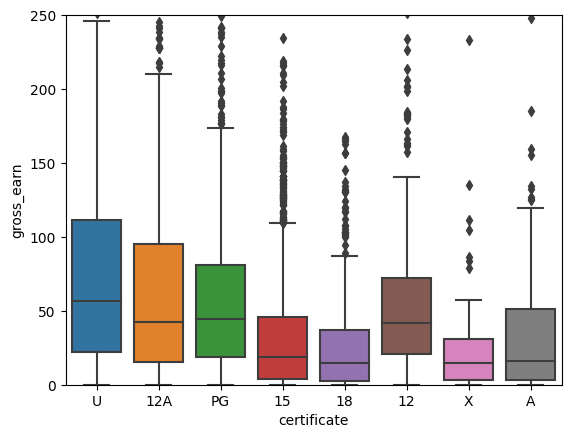

In [ ]:
sns.boxplot(x='certificate', y='gross_earn', data=dataset_certificate_top_8)
plt.axis(ymin=0, ymax=250)
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).
3.   О средних величинах (как распределена медиана).

1. Фильмы с более высокими возрастными ограничениями имеют меньшие значения основных показателей статистики доходов.
2. Все графики имеют выбросы выше максимума,третий квартиль имеет самый большой размах данных
3.Медиана находится в нижней части графиков

Можно предположить, т.е. сформулировать гипотезу, что признаки взаимосвязаны. И наоборот, если медианные значения расположены примерно на одном уровне, то можно предположить, что признаки независимы. Еще интересно попробовать проранжировать классы по возрастным ограничениям, тогда, возможно, также будет заметна тенденция к увеличению или снижению доходов в зависимости от установленного класса фильмов.

### **9.2. certificate - runtime_clear*

По аналогии проанализируйте взаимосвязь между классами фильмов и их продолжительностью

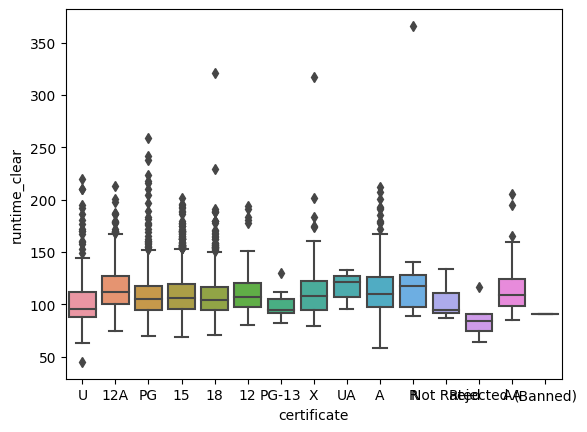

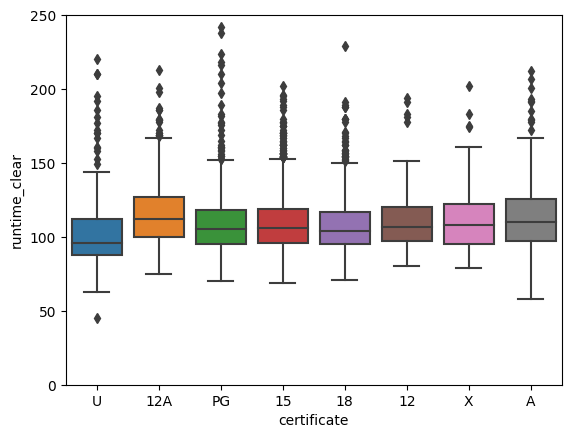

In [ ]:
dataset.groupby(by='certificate')['runtime_clear'].median()
dataset.groupby(by='certificate').describe()
sns.boxplot(x = 'certificate', y = 'runtime_clear', data=dataset)
plt.show()
dataset['certificate'].value_counts()
certificate_list = dataset['certificate'].value_counts()[:8].index
certificate_list
dataset_certificate_top_8 = dataset[dataset['certificate'].isin(certificate_list)]
dataset_certificate_top_8.shape
sns.boxplot(x='certificate', y='runtime_clear', data=dataset_certificate_top_8)
plt.axis(ymin=0, ymax=250)
plt.show()

### **9.3. director - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между кинорежиссерами и доходами с фильмов

In [ ]:
dataset.groupby(by='director')['gross_earn'].median()

director
A.R. Murugadoss        2.43
Aamir Khan             1.22
Aanand L. Rai          0.88
Aaron Blaise          85.34
Aaron Schneider        9.18
                      ...  
Zal Batmanglij         2.27
Zaza Urushadze         0.14
Zoya Akhtar            3.11
Álex de la Iglesia     0.00
Ömer Faruk Sorak        NaN
Name: gross_earn, Length: 1954, dtype: float64

In [ ]:
dataset.groupby(by='director').describe()

rating                                    gross_earn  \
                    count mean  std  min  25%  50%  75%  max      count   
director                                                                  
A.R. Murugadoss       1.0  7.0  NaN  7.0  7.0  7.0  7.0  7.0        1.0   
Aamir Khan            1.0  8.0  NaN  8.0  8.0  8.0  8.0  8.0        1.0   
Aanand L. Rai         2.0  7.0  0.0  7.0  7.0  7.0  7.0  7.0        1.0   
Aaron Blaise          1.0  6.0  NaN  6.0  6.0  6.0  6.0  6.0        1.0   
Aaron Schneider       1.0  7.0  NaN  7.0  7.0  7.0  7.0  7.0        1.0   
...                   ...  ...  ...  ...  ...  ...  ...  ...        ...   
Zal Batmanglij        1.0  6.0  NaN  6.0  6.0  6.0  6.0  6.0        1.0   
Zaza Urushadze        1.0  8.0  NaN  8.0  8.0  8.0  8.0  8.0        1.0   
Zoya Akhtar           1.0  8.0  NaN  8.0  8.0  8.0  8.0  8.0        1.0   
Álex de la Iglesia    1.0  6.0  NaN  6.0  6.0  6.0  6.0  6.0        1.0   
Ömer Faruk Sorak      1.0  8.0  NaN  8.0  8.0  8.0  8.0  8.0        0.0   

                           ...               runtime_clear                   \
                     mean  ...    75%    max         count   mean       std   
director                   ...                                                
A.R. Murugadoss      2.43  ...   2.43   2.43           1.0  186.0       NaN   
Aamir Khan           1.22  ...   1.22   1.22           1.0  165.0       NaN   
Aanand L. Rai        0.88  ...   0.88   0.88           2.0  134.0  8.485281   
Aaron Blaise        85.34  ...  85.34  85.34           1.0   85.0       NaN   
Aaron Schneider      9.18  ...   9.18   9.18           1.0  103.0       NaN   
...                   ...  ...    ...    ...           ...    ...       ...   
Zal Batmanglij       2.27  ...   2.27   2.27           1.0  116.0       NaN   
Zaza Urushadze       0.14  ...   0.14   0.14           1.0   87.0       NaN   
Zoya Akhtar          3.11  ...   3.11   3.11           1.0  155.0       NaN   
Álex de la Iglesia   0.00  ...   0.00   0.00           1.0  108.0       NaN   
Ömer Faruk Sorak      NaN  ...    NaN    NaN           1.0  127.0       NaN   

                                                       
                      min    25%    50%    75%    max  
director                                               
A.R. Murugadoss     186.0  186.0  186.0  186.0  186.0  
Aamir Khan          165.0  165.0  165.0  165.0  165.0  
Aanand L. Rai       128.0  131.0  134.0  137.0  140.0  
Aaron Blaise         85.0   85.0   85.0   85.0   85.0  
Aaron Schneider     103.0  103.0  103.0  103.0  103.0  
...                   ...    ...    ...    ...    ...  
Zal Batmanglij      116.0  116.0  116.0  116.0  116.0  
Zaza Urushadze       87.0   87.0   87.0   87.0   87.0  
Zoya Akhtar         155.0  155.0  155.0  155.0  155.0  
Álex de la Iglesia  108.0  108.0  108.0  108.0  108.0  
Ömer Faruk Sorak    127.0  127.0  127.0  127.0  127.0  

[1954 rows x 24 columns]

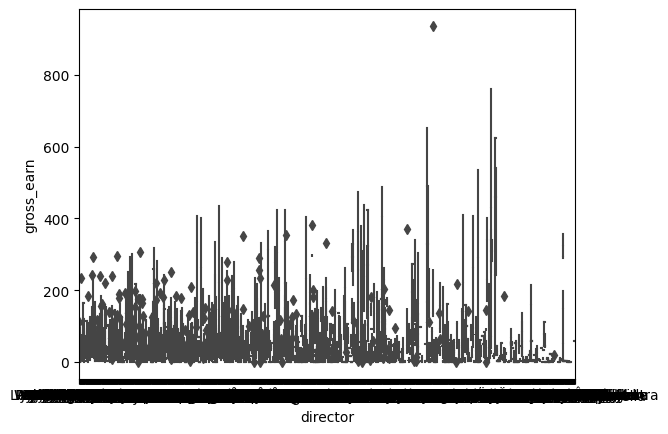

In [ ]:
sns.boxplot(x = 'director', y = 'gross_earn', data=dataset)
plt.show()

In [ ]:
director = dataset['director'].value_counts()[:5].index
director

Index(['Woody Allen', 'Steven Spielberg', 'Clint Eastwood', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object')

In [ ]:
dataset_director_5 = dataset[dataset['director'].isin(director)]
dataset_director_5.shape

(137, 12)

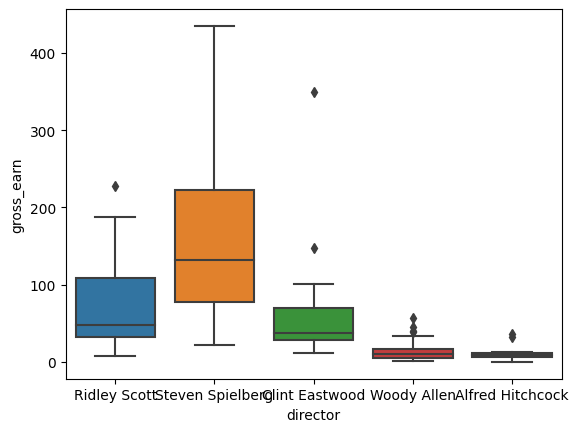

In [ ]:
sns.boxplot(x='director', y='gross_earn', data=dataset_director_5)
# plt.axis(ymin=0, ymax=2500000)
plt.show()

### **9.4. director - runtime_clear*

In [ ]:
dataset.groupby(by='director')['runtime_clear'].median()


director
A.R. Murugadoss       186.0
Aamir Khan            165.0
Aanand L. Rai         134.0
Aaron Blaise           85.0
Aaron Schneider       103.0
                      ...  
Zal Batmanglij        116.0
Zaza Urushadze         87.0
Zoya Akhtar           155.0
Álex de la Iglesia    108.0
Ömer Faruk Sorak      127.0
Name: runtime_clear, Length: 1954, dtype: float64

In [ ]:
dataset.groupby(by='director').describe()

rating                                    gross_earn  \
                    count mean  std  min  25%  50%  75%  max      count   
director                                                                  
A.R. Murugadoss       1.0  7.0  NaN  7.0  7.0  7.0  7.0  7.0        1.0   
Aamir Khan            1.0  8.0  NaN  8.0  8.0  8.0  8.0  8.0        1.0   
Aanand L. Rai         2.0  7.0  0.0  7.0  7.0  7.0  7.0  7.0        1.0   
Aaron Blaise          1.0  6.0  NaN  6.0  6.0  6.0  6.0  6.0        1.0   
Aaron Schneider       1.0  7.0  NaN  7.0  7.0  7.0  7.0  7.0        1.0   
...                   ...  ...  ...  ...  ...  ...  ...  ...        ...   
Zal Batmanglij        1.0  6.0  NaN  6.0  6.0  6.0  6.0  6.0        1.0   
Zaza Urushadze        1.0  8.0  NaN  8.0  8.0  8.0  8.0  8.0        1.0   
Zoya Akhtar           1.0  8.0  NaN  8.0  8.0  8.0  8.0  8.0        1.0   
Álex de la Iglesia    1.0  6.0  NaN  6.0  6.0  6.0  6.0  6.0        1.0   
Ömer Faruk Sorak      1.0  8.0  NaN  8.0  8.0  8.0  8.0  8.0        0.0   

                           ...               runtime_clear                   \
                     mean  ...    75%    max         count   mean       std   
director                   ...                                                
A.R. Murugadoss      2.43  ...   2.43   2.43           1.0  186.0       NaN   
Aamir Khan           1.22  ...   1.22   1.22           1.0  165.0       NaN   
Aanand L. Rai        0.88  ...   0.88   0.88           2.0  134.0  8.485281   
Aaron Blaise        85.34  ...  85.34  85.34           1.0   85.0       NaN   
Aaron Schneider      9.18  ...   9.18   9.18           1.0  103.0       NaN   
...                   ...  ...    ...    ...           ...    ...       ...   
Zal Batmanglij       2.27  ...   2.27   2.27           1.0  116.0       NaN   
Zaza Urushadze       0.14  ...   0.14   0.14           1.0   87.0       NaN   
Zoya Akhtar          3.11  ...   3.11   3.11           1.0  155.0       NaN   
Álex de la Iglesia   0.00  ...   0.00   0.00           1.0  108.0       NaN   
Ömer Faruk Sorak      NaN  ...    NaN    NaN           1.0  127.0       NaN   

                                                       
                      min    25%    50%    75%    max  
director                                               
A.R. Murugadoss     186.0  186.0  186.0  186.0  186.0  
Aamir Khan          165.0  165.0  165.0  165.0  165.0  
Aanand L. Rai       128.0  131.0  134.0  137.0  140.0  
Aaron Blaise         85.0   85.0   85.0   85.0   85.0  
Aaron Schneider     103.0  103.0  103.0  103.0  103.0  
...                   ...    ...    ...    ...    ...  
Zal Batmanglij      116.0  116.0  116.0  116.0  116.0  
Zaza Urushadze       87.0   87.0   87.0   87.0   87.0  
Zoya Akhtar         155.0  155.0  155.0  155.0  155.0  
Álex de la Iglesia  108.0  108.0  108.0  108.0  108.0  
Ömer Faruk Sorak    127.0  127.0  127.0  127.0  127.0  

[1954 rows x 24 columns]

In [ ]:
# sns.boxplot(x = 'director', y = 'runtime_clear', data=dataset)
# plt.show()

In [ ]:
director = dataset['director'].value_counts()[:5].index
director

Index(['Woody Allen', 'Steven Spielberg', 'Clint Eastwood', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object')

In [ ]:
dataset_director_5 = dataset[dataset['director'].isin(director)]
dataset_director_5.shape

(137, 12)

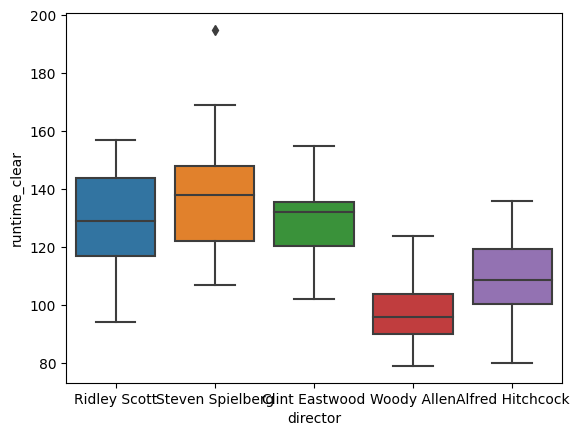

In [ ]:
sns.boxplot(x='director', y='runtime_clear', data=dataset_director_5)
# plt.axis(ymin=0, ymax=2500000)
plt.show()

По аналогии проанализируйте взаимосвязь между кинорежиссерами и продолжительностью фильмов

### **9.5. rating - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и доходами с фильмов

In [ ]:
dataset.groupby(by='rating')['gross_earn'].median()

rating
1     7.015
2    13.635
3    23.640
4    26.640
5    32.925
6    31.600
7    21.380
8    15.610
9    96.900
Name: gross_earn, dtype: float64

In [ ]:
dataset.groupby(by='rating').describe()

gross_earn                                                           \
            count        mean         std   min      25%     50%       75%   
rating                                                                       
1             4.0    7.062500    6.028816  0.03   3.6975   7.015   10.3800   
2            12.0   19.140000   15.866637  2.41   5.8475  13.635   29.9125   
3            41.0   27.430976   23.430608  0.12  11.4400  23.640   37.1900   
4           155.0   40.685419   45.876559  0.00  14.0650  26.640   52.5150   
5           706.0   44.485085   42.779963  0.00  17.0850  32.925   60.0425   
6          1770.0   48.215452   57.619080  0.00   8.7275  31.600   64.3875   
7          1553.0   49.140116   76.929433  0.00   4.0600  21.380   60.3600   
8           326.0   66.611810  102.012521  0.01   2.0825  15.610   84.7375   
9             7.0  176.368571  201.170200  4.36  42.8200  96.900  256.4100   

               runtime_clear                                             \
           max         count        mean        std   min    25%    50%   
rating                                                                    
1        14.19           4.0   86.750000   4.193249  81.0   85.5   87.5   
2        48.55          14.0  100.214286  18.905345  83.0   87.0   95.0   
3       107.33          42.0   96.380952  11.371664  79.0   89.0   94.0   
4       296.62         164.0   97.579268  14.498142  71.0   89.0   95.0   
5       402.11         755.0  101.268874  13.403670  76.0   92.0   99.0   
6       652.27        1866.0  106.963558  15.520453  74.0   96.0  105.0   
7       936.66        1725.0  115.001739  22.630121  63.0  100.0  112.0   
8       623.28         392.0  128.951531  33.773508  45.0  106.0  125.0   
9       534.86           8.0  156.250000  45.662582  87.0  130.5  163.5   

                       
           75%    max  
rating                 
1        88.75   91.0  
2       102.75  152.0  
3       100.75  127.0  
4       102.00  180.0  
5       108.00  175.0  
6       115.00  198.0  
7       126.00  317.0  
8       144.00  366.0  
9       196.50  202.0

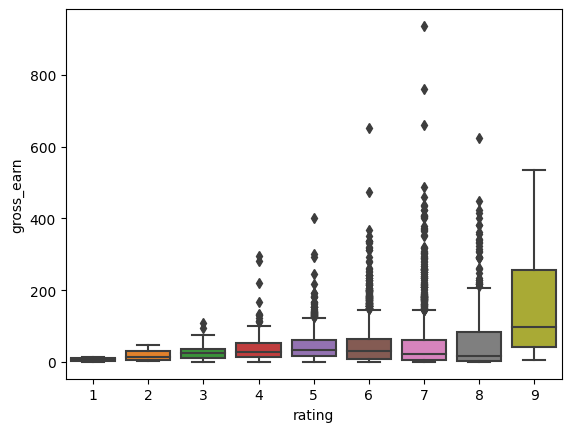

In [ ]:
sns.boxplot(x = 'rating', y = 'gross_earn', data=dataset)
plt.show()

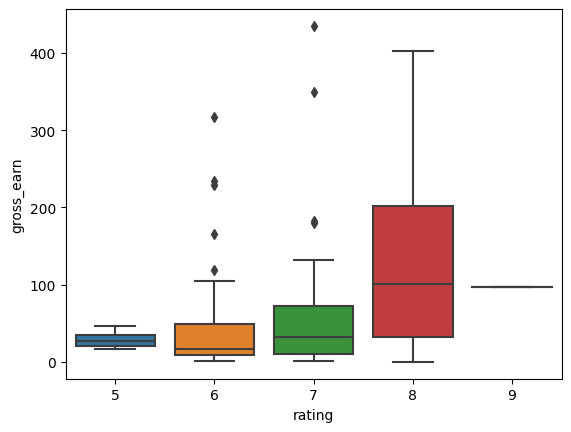

In [ ]:
sns.boxplot(x='rating', y='gross_earn', data=dataset_director_5)
# plt.axis(ymin=0, ymax=2500000)
plt.show()

### **9.6. rating - runtime_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и их продолжительностью

In [ ]:
dataset.groupby(by='rating')['runtime_clear'].median()

rating
1     87.5
2     95.0
3     94.0
4     95.0
5     99.0
6    105.0
7    112.0
8    125.0
9    163.5
Name: runtime_clear, dtype: float64

In [ ]:
dataset.groupby(by='rating').describe()

gross_earn                                                           \
            count        mean         std   min      25%     50%       75%   
rating                                                                       
1             4.0    7.062500    6.028816  0.03   3.6975   7.015   10.3800   
2            12.0   19.140000   15.866637  2.41   5.8475  13.635   29.9125   
3            41.0   27.430976   23.430608  0.12  11.4400  23.640   37.1900   
4           155.0   40.685419   45.876559  0.00  14.0650  26.640   52.5150   
5           706.0   44.485085   42.779963  0.00  17.0850  32.925   60.0425   
6          1770.0   48.215452   57.619080  0.00   8.7275  31.600   64.3875   
7          1553.0   49.140116   76.929433  0.00   4.0600  21.380   60.3600   
8           326.0   66.611810  102.012521  0.01   2.0825  15.610   84.7375   
9             7.0  176.368571  201.170200  4.36  42.8200  96.900  256.4100   

               runtime_clear                                             \
           max         count        mean        std   min    25%    50%   
rating                                                                    
1        14.19           4.0   86.750000   4.193249  81.0   85.5   87.5   
2        48.55          14.0  100.214286  18.905345  83.0   87.0   95.0   
3       107.33          42.0   96.380952  11.371664  79.0   89.0   94.0   
4       296.62         164.0   97.579268  14.498142  71.0   89.0   95.0   
5       402.11         755.0  101.268874  13.403670  76.0   92.0   99.0   
6       652.27        1866.0  106.963558  15.520453  74.0   96.0  105.0   
7       936.66        1725.0  115.001739  22.630121  63.0  100.0  112.0   
8       623.28         392.0  128.951531  33.773508  45.0  106.0  125.0   
9       534.86           8.0  156.250000  45.662582  87.0  130.5  163.5   

                       
           75%    max  
rating                 
1        88.75   91.0  
2       102.75  152.0  
3       100.75  127.0  
4       102.00  180.0  
5       108.00  175.0  
6       115.00  198.0  
7       126.00  317.0  
8       144.00  366.0  
9       196.50  202.0

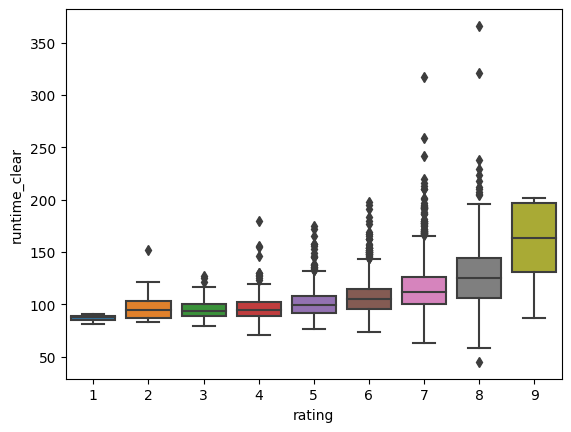

In [ ]:
sns.boxplot(x = 'rating', y = 'runtime_clear', data=dataset)
plt.show()

## 10. Общий вывод

Соберите промежуточные выводы в итоговый вывод по разведочному анализу

Рассчитали максимальное и минимальное значения доходов с фильмов, наибольший доход:  936.66 Наименьший доход:  0.1.Размах значений является довольно таки большим.
Нулевые значение были , в процессе анализа мы решили их убрать.
Расчитали среднее и медианное значение. Средний доход с фильма получился : 49.07,Медиана доходов фильмов:  28.345.Среднее арифметическое набора данных находится суммированием всех чисел в выборке и делением полученной суммы на количество чисел. Медиана — это число, которое окажется строго по центру списка чисел в наборе данных, если их предварительно упорядочить по возрастанию
10 % равно или  не превышают доход 0.7
25 % равно или  не превышают доход 7
50 % равно или не превышают доход 28.345
75 % равно или не превышают доход 63.04
90 % равно или не превышают доход 121.9

Выводы по графику ящик с усами:
Ящик с усами показывает максимальное значение ,размах, минимальное значение, медиану, квартили и выбросы.
Гистограмма:
Показывает что у большинства фильмов доход ~7.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


Выводы:
Количество уникальный признаков равнялось 15
Набиолее часто встречаемое значении признака "15", встретилось оно 1843 раза.
Наименее встречаемые (Banned)
Наиболее встречаемые  "15"
Около 1800 фильмов имеют сертификацию "15"


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Следует предположить, т.е. составить гипотезу, что данные показатели независимы, а далее проверить эту гипотезу в рамках статистического анализа. Фильмы собравшие больше 30000, имеют продолжительность больше 120 минут.

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

1.Точных взаимосвязей не отслеживается. Можно выделить - фильмы высоких возрастных категорий(18, АА) имеют маленький процент среди остальных
2. Часть режиссеров имеет один ярко выраженный признак(Hitchcock, Eastwood),другие имеют менее выраженный признак

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

1. Фильмы с более высокими возрастными ограничениями имеют меньшие значения основных показателей статистики доходов.
2. Все графики имеют выбросы выше максимума,третий квартиль имеет самый большой размах данных
3.Медиана находится в нижней части графиков


**Поздравляем! Часть 2 задания по модулю EDA выполнена! Далее Вас ожидают кейсы на фильтрацию, срезы и группировку!**